In [1]:
import numpy as np
from numpy import loadtxt
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

In [2]:
warnings.simplefilter("ignore")

In [3]:
np.random.seed(1)

In [4]:
from keras.models import Sequential
from keras.callbacks import Callback
from keras.layers import Dense
from keras.regularizers import l2
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.initializers import RandomUniform

Using TensorFlow backend.


In [5]:
train3 = loadtxt("/home/umair/Desktop/Data Science and BI/machine learning/Monk/monks-3.train",
                         delimiter=' ', usecols=range(1, 8))
test3 = loadtxt("/home/umair/Desktop/Data Science and BI/machine learning/Monk/monks-3.test',
                        delimiter=' ', usecols=range(1, 8))


In [6]:
X_train3=train3[:, 1:7]
y_train3=train3[:, 0]

X_test3=test3[:, 1:7]
y_test3=test3[:, 0]

In [7]:
from sklearn.preprocessing import OneHotEncoder

In [8]:
enc=OneHotEncoder()

In [9]:
X_train3=enc.fit_transform(X_train3).toarray()

X_test3=enc.fit_transform(X_test3).toarray()

In [10]:
def create_modelCV(lr=0.1, mom=0.1, act='sigmoid', alpha=0.001):
    # create model
    model = Sequential()
    model.add(Dense(4, input_dim=17, kernel_initializer=RandomUniform(minval=-0.01, maxval=0.01, seed=1), 
                    activation=act, kernel_regularizer=l2(alpha)))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='mean_squared_error', metrics=['accuracy'], optimizer= SGD(lr=lr, momentum=mom, nesterov=False))
    return model

In [11]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV


hyper_params_space = {
        'lr': [0.1, 0.3, 0.5],
        'mom': [0.01, 0.1, 0.2, 0.5, 0.8],
        'act': ['relu'],
        'alpha': [1e-5, 1e-10, 1e-15, 1e-20]
    },



print('===================================')
model = KerasClassifier(build_fn=create_modelCV, batch_size=25, epochs=150)
mlpr = GridSearchCV( model
                    , hyper_params_space, scoring=['accuracy'], refit='accuracy', cv=3, n_jobs=2)
mlpr.fit(X_train3, y_train3)
print("DONE")
resultGSCV=pd.DataFrame(mlpr.cv_results_)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/150
122/122 [==============================] - 0s 736us/step - loss: 0.2496 - accuracy: 0.5410
Epoch 2/150
122/122 [==============================] - 0s 73us/step - loss: 0.2473 - accuracy: 0.6967
Epoch 3/150
122/122 [==============================] - 0s 58us/step - loss: 0.2432 - accuracy: 0.5492
Epoch 4/150
122/122 [==============================] - 0s 61us/step - loss: 0.2387 - accuracy: 0.6148
Epoch 5/150
122/122 [==============================] - 0s 97us/step - loss: 0.2341 - accuracy: 0.6066
Epoch 6/150
122/122 [==============================] - 0s 84us/step - loss: 0.2298 - accuracy: 0.7131
Epoch 7/150
122/122 [==============================] - 0s 106us/step - loss: 0.2256 - accuracy: 0.7131
Epoch 8/150
122/122 [==============================] - 0s 52us/step - loss: 0.2214 - accuracy: 0.7705
Epoch 9/150
122/122 [==============================] - 0s 85us

In [12]:
mlpr.best_params_

{'act': 'relu', 'alpha': 1e-05, 'lr': 0.1, 'mom': 0.1}

In [13]:
def create_modelOP():
    # create model
    model = Sequential()
    model.add(Dense(4, input_dim=17, activation=mlpr.best_params_['act'], 
                    kernel_initializer=RandomUniform(minval=-0.01, maxval=0.01, seed=1),
                   kernel_regularizer=l2(mlpr.best_params_['alpha'])))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='mean_squared_error', metrics=['accuracy'], 
                  optimizer= SGD(lr=mlpr.best_params_['lr'], 
                                 momentum=mlpr.best_params_['mom']))
    return model

In [14]:
#instantiate the model and run it
#es = EarlyStopping(monitor='val_loss', patience=30)
#mc = ModelCheckpoint('best_model_NOREG.h5', monitor='val_loss', save_best_only=True)

model1 = create_modelOP()

history1 = model1.fit(X_train3, y_train3, 
                      validation_data=(X_test3, y_test3), 
                      epochs=150, 
                      batch_size=25, 
                      #callbacks=[es,mc]
                     ).history

Train on 122 samples, validate on 432 samples
Epoch 1/150
122/122 [==============================] - 0s 958us/step - loss: 0.2489 - accuracy: 0.6066 - val_loss: 0.2461 - val_accuracy: 0.9282
Epoch 2/150
122/122 [==============================] - 0s 205us/step - loss: 0.2445 - accuracy: 0.8934 - val_loss: 0.2413 - val_accuracy: 0.9491
Epoch 3/150
122/122 [==============================] - 0s 149us/step - loss: 0.2399 - accuracy: 0.8934 - val_loss: 0.2363 - val_accuracy: 0.9213
Epoch 4/150
122/122 [==============================] - 0s 195us/step - loss: 0.2352 - accuracy: 0.9016 - val_loss: 0.2313 - val_accuracy: 0.9167
Epoch 5/150
122/122 [==============================] - 0s 143us/step - loss: 0.2305 - accuracy: 0.9180 - val_loss: 0.2259 - val_accuracy: 0.9074
Epoch 6/150
122/122 [==============================] - 0s 170us/step - loss: 0.2253 - accuracy: 0.8770 - val_loss: 0.2205 - val_accuracy: 0.9259
Epoch 7/150
122/122 [==============================] - 0s 180us/step - loss: 0.2197 

Epoch 57/150
122/122 [==============================] - 0s 188us/step - loss: 0.0670 - accuracy: 0.9344 - val_loss: 0.0504 - val_accuracy: 0.9722
Epoch 58/150
122/122 [==============================] - 0s 140us/step - loss: 0.0665 - accuracy: 0.9344 - val_loss: 0.0502 - val_accuracy: 0.9722
Epoch 59/150
122/122 [==============================] - 0s 181us/step - loss: 0.0658 - accuracy: 0.9344 - val_loss: 0.0497 - val_accuracy: 0.9722
Epoch 60/150
122/122 [==============================] - 0s 149us/step - loss: 0.0652 - accuracy: 0.9344 - val_loss: 0.0490 - val_accuracy: 0.9722
Epoch 61/150
122/122 [==============================] - 0s 180us/step - loss: 0.0648 - accuracy: 0.9344 - val_loss: 0.0483 - val_accuracy: 0.9722
Epoch 62/150
122/122 [==============================] - 0s 145us/step - loss: 0.0643 - accuracy: 0.9344 - val_loss: 0.0479 - val_accuracy: 0.9722
Epoch 63/150
122/122 [==============================] - 0s 160us/step - loss: 0.0640 - accuracy: 0.9344 - val_loss: 0.0473 -

122/122 [==============================] - 0s 146us/step - loss: 0.0540 - accuracy: 0.9344 - val_loss: 0.0412 - val_accuracy: 0.9722
Epoch 114/150
122/122 [==============================] - 0s 166us/step - loss: 0.0542 - accuracy: 0.9344 - val_loss: 0.0410 - val_accuracy: 0.9722
Epoch 115/150
122/122 [==============================] - 0s 166us/step - loss: 0.0540 - accuracy: 0.9344 - val_loss: 0.0409 - val_accuracy: 0.9722
Epoch 116/150
122/122 [==============================] - 0s 157us/step - loss: 0.0535 - accuracy: 0.9344 - val_loss: 0.0410 - val_accuracy: 0.9722
Epoch 117/150
122/122 [==============================] - 0s 198us/step - loss: 0.0536 - accuracy: 0.9344 - val_loss: 0.0411 - val_accuracy: 0.9722
Epoch 118/150
122/122 [==============================] - 0s 145us/step - loss: 0.0540 - accuracy: 0.9344 - val_loss: 0.0411 - val_accuracy: 0.9722
Epoch 119/150
122/122 [==============================] - 0s 209us/step - loss: 0.0533 - accuracy: 0.9344 - val_loss: 0.0410 - val_ac

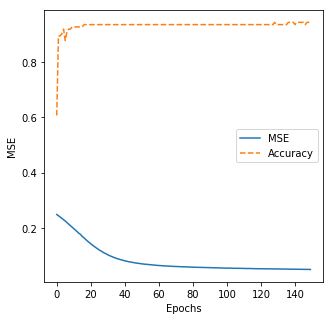

In [21]:
#See if we have overfitting
plt.figure(figsize=(5,5))
plt.plot(history1['loss'], label='MSE')
plt.plot(history1['accuracy'], label='Accuracy', linestyle='dashed')
#plt.plot(history1['val_loss'], label='Test')
#plt.title('Learning curves for training', fontsize = 18)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

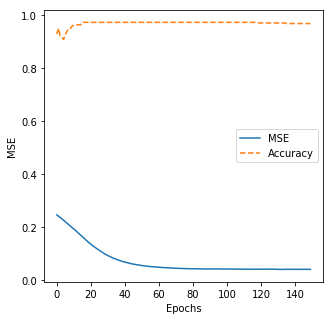

In [22]:
#See if we have overfitting
plt.figure(figsize=(5,5))
plt.plot(history1['val_loss'], label='MSE')
plt.plot(history1['val_accuracy'], label='Accuracy', linestyle='dashed')
#plt.plot(history1['val_loss'], label='Test')
#plt.title('Learning curves for test', fontsize = 18)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [17]:
mse, accuracy = model1.evaluate(X_test3, y_test3)

432/432 [==============================] - 0s 19us/step


In [18]:
print("Accuracy on Test", accuracy)
print("MSE on Test", mse)

Accuracy on Test 0.9675925970077515
MSE on Test 0.040549751888546676


In [19]:
mse_tr, accuracy_tr = model1.evaluate(X_train3, y_train3)

122/122 [==============================] - 0s 86us/step


In [20]:
print("Accuracy on Training", accuracy_tr)
print("MSE on Training", mse_tr)

Accuracy on Training 0.9426229596138
MSE on Training 0.0503210794241702
